> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset: Factors of No-Show to Dr. Appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sb 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('no_shows.csv')
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Getting descriptive statistics of the dataset such as min, max, mean, median, etc.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
#lets see if there are any null values and the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


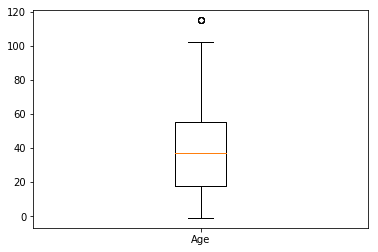

 115    5
 100    4
 102    2
 99     1
-1      1
Name: Age, dtype: int64

In [11]:
#This makes detecting the outliers easy
plt.boxplot(df['Age'], labels=['Age'])
plt.show()

#this counts the ages that need removed (-1 and 115)
df['Age'].value_counts().tail()

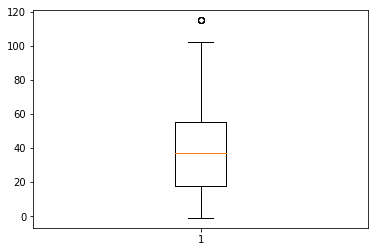


 Handicap value counts:


0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [6]:
print('\n Handicap value counts:')
df['Handcap'].value_counts()

As we can see there are fortunately no null values, but this data still needs cleaned. The age value of-1 needs removed. The 5 people aged at 115 also needs removed (unlikely five people are living at that age). The 'Handcap' value range of 0-4 is not the same 0-1 range of the other features, so that preprocessing.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

In [6]:
#getting rid of the -1 in Age
df.drop(df[df.Age < 0].index, inplace=True)
#removes the supposed 115 year olds
df.drop(df[df.Age > 110].index, inplace=True)

##### Let's add a column for the number of days between the scheduled day and appointment day. 

In [7]:
#difference between the these features after converting them to datetime using pd.to_datetime()
df['WaitDays'] = pd.to_datetime(df.ScheduledDay) - pd.to_datetime(df.AppointmentDay)

#gets the days and the absolute value
df['WaitDays'] = df['WaitDays'].apply(lambda x: int(abs(x.days)))

#### Patient Id counting and cleaning

In [8]:
#We need to know how many patients exist, and the record of the patients appointment attendance

print('Number of patients:', df.PatientId.nunique())
print()
#This shows the number of no-shows per patient
no_shows = df[df['No-show'] == 'Yes']['PatientId'].value_counts()

print('Number of patients with at least one no-show:', len(no_shows))
print()
print('Top 10 patients with most no-shows:\n', no_shows.head(10))

#'PatientId' column are floating point numbers. We really just want them as integers. 
df.PatientId = df.PatientId.astype(int)
print()
print(df.PatientId.head())# these numbers are too large for less than 70,000 patients 

Number of patients: 62296

Number of patients with at least one no-show: 17662

Top 10 patients with most no-shows:
 1.421987e+12    18
5.635135e+14    16
5.587790e+12    15
5.811973e+14    14
6.575144e+13    13
1.198157e+12    12
4.768616e+11    11
2.491637e+14    11
9.715136e+12    11
2.728422e+12    11
Name: PatientId, dtype: int64

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: int64



In [ ]:
dates = df.loc[:, ['ScheduledDay', 'AppointmentDay']] #saves a copy of dates in variable
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
 
dates.head()

In [ ]:
#let's check to see if these rows are gone
print('New data shape:', df.shape)
df.Age.describe()

In [ ]:
#let's get a look at this data to make sure there are no negative numbers, and to see if they make sense
df.WaitDays.describe()

In [ ]:
df.head()

In [ ]:
#get total number of unique neighborhoods
print('Number of unique neighborhoods:', df['Neighbourhood'].nunique()

### Data Preprocessing

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What are the feature importances with respect to the no-show outcome ranked from greatest to least?

### Research Question 2: What machine learning models can best predict the no-show outcome given the features? To what accuracy can these machine learning models predict the outcome of no-show?

### Research Question 3: Do holidays during the wait days affect the no-show outcome? If so, to what extent? 

### Research Question 4: Does the national ranking of the hospital affect the no-show outcome?

http://hospitals.webometrics.info/en/latin_america/brazil

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

Filtering outliers:
https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

Removing rows:
https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe